## Some theory

Types of data used for I/O:

1. Text-'12345' as a sequence of unicode char

2. Binary-12345 as a sequence of bytes of its binary equivalent.

There are two types of files to deal with:

1. Text files - all program files are text files

2. Binary files - images,music,video,exe files


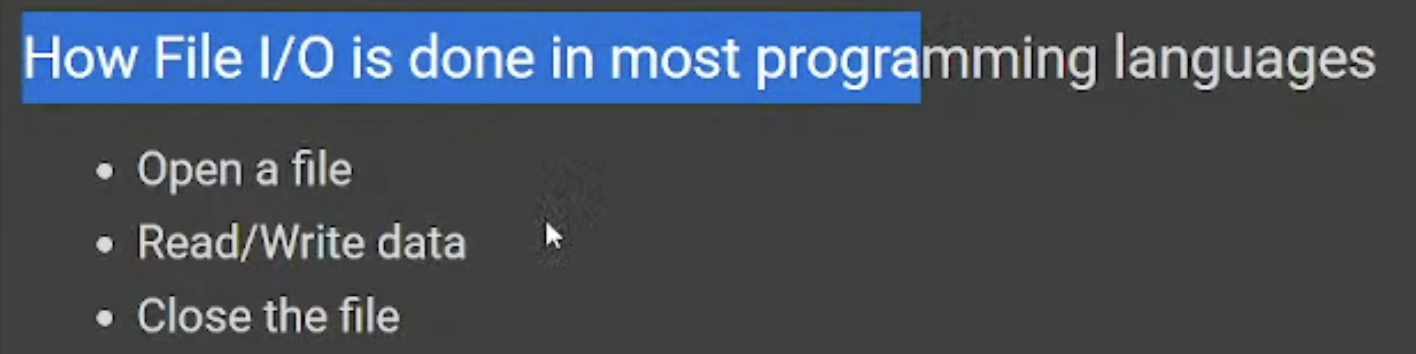

## Writing a File

In [ ]:
## Textual file 

## case1- if the file is not present
f= open('sample.txt','w') ##file handler object 
f.write('Hello World')
f.close()

## after closing the file we cannot directly write again to the file 

In [6]:
f.write('Hello') ## since file is closed hence this will not work 

ValueError: I/O operation on closed file.

In [7]:
## write multiline strings 

f=open('sample1.txt','w')
f.write('hello world')
f.write('\nhow are you?') ## to change line
f.close()

In [ ]:
## if the file is already present

f =open('sample.txt','w')
f.write('salman bhai')
f.close()
## purana wala content is replaced by new one 

## if you write on exisitng file all the old content is removed and new content gets written

In [ ]:
## how exactly the open() works ?

## these files are in ROM (harddrive) not in RAM.. 
## f =open('sample.txt','w') -> python loads the file into ram and usko buffer memory mein load karta hai (file is read char by char)
## jab tak operation perform kar rahe ho file is in ram 
## when you use close opn file memory se jake wapas hardrive chali jati hai 

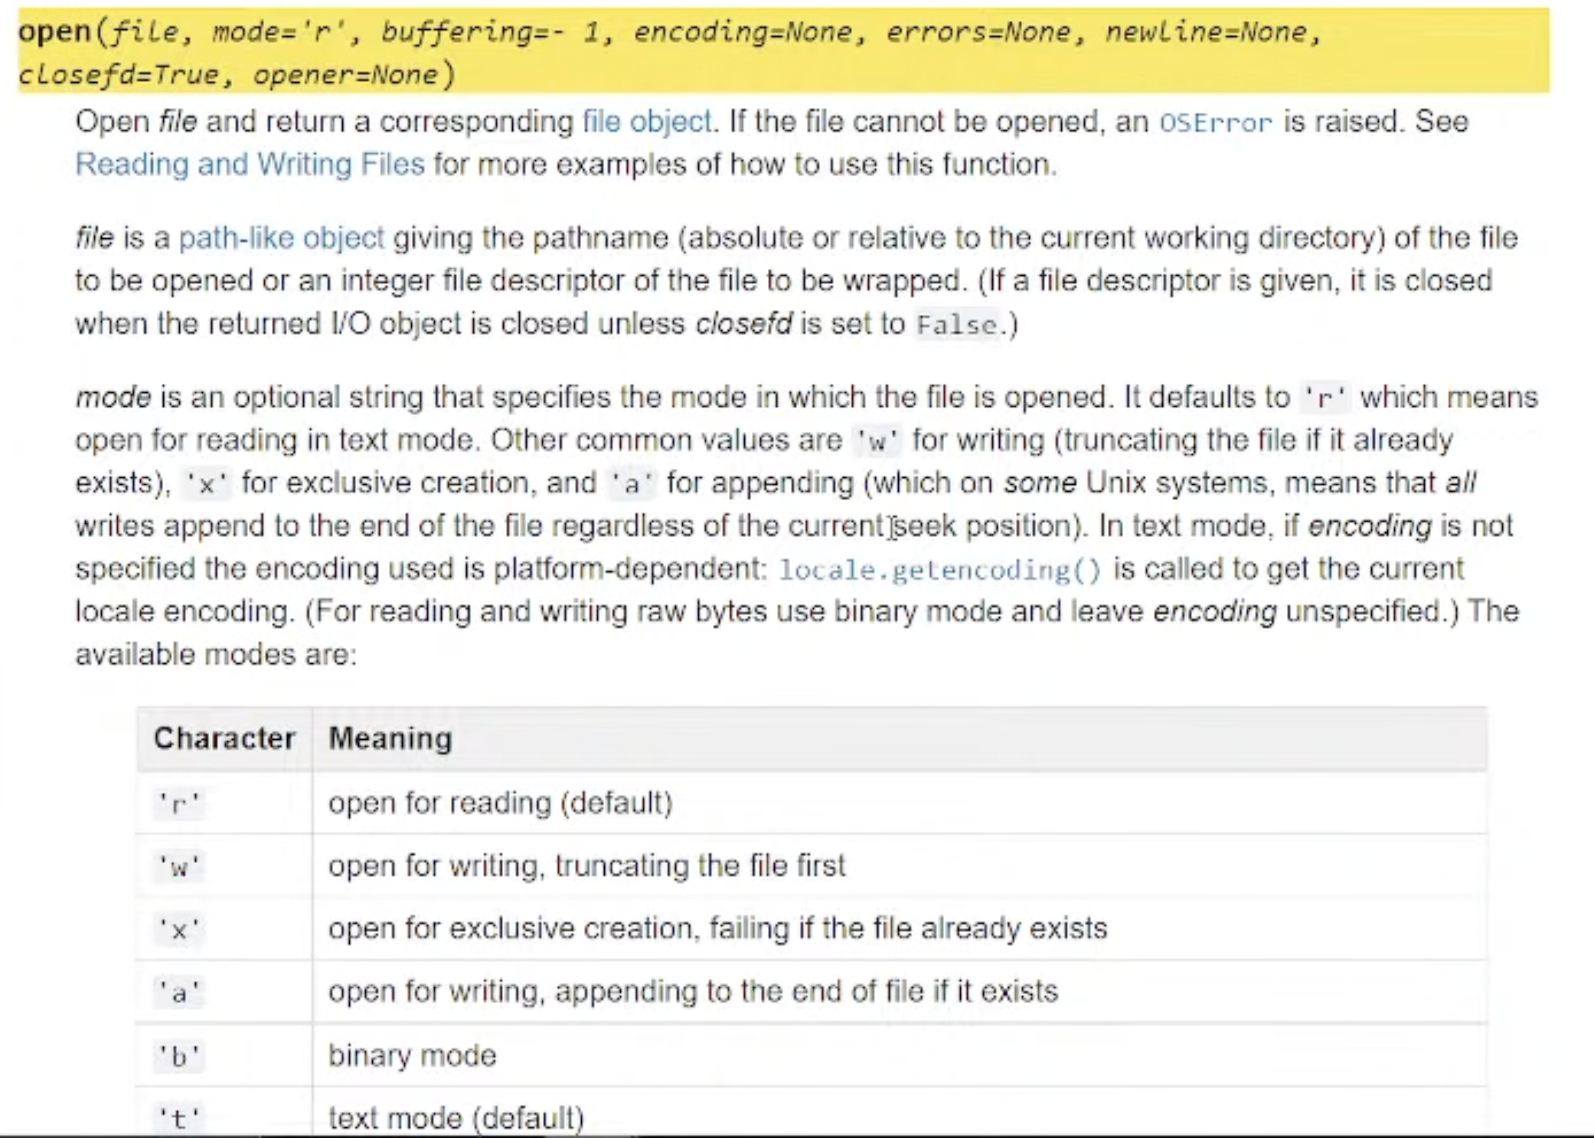

In [9]:
## problem with w mode: old content is removed from existing file

## introducing append mode

f= open('sample.txt','a')
f.write("I am fine")
f.close()

In [10]:
## write lines

L=['Hello\n','Hi\n','How are you?\n','I am fine\n']

f= open('sample3.txt','w')
f.writelines(L)

f.close()



In [11]:
## why f.close() -> memory ( to remove file from ram) 2nd reason is safety (if someone hacks your computer he can access your ram )

In [19]:
## reading from files
## ->using read()


f= open('sample1.txt','r')
s=f.read()
print(s)
f.close()

hello world
how are you?


In [20]:
## reading upto n chars ( i want to read first 10 characters)
f= open('sample1.txt','r')
s=f.read(10)
print(s)
f.close()

hello worl


In [23]:
## readline() -> to read line by line

f=open('sample3.txt','r')
print(f.readline()) ## readline khud line change kardeta and if you print then print also changes line ( therefore use end='' in print)
print(f.readline())
print(f.readline())
f.close()


##in which scenario you use read and in which scenario you use readline ? 

## you use readline when file has huge content and you don't want to read all the content 

Hello

Hi

How are you?



In [28]:
## reading entire using readline 

f=open('sample3.txt','r')

while True:
    data=f.readline()
    if data=='':
        break

    else :
        print(data,end='')
f.close()

Hello
Hi
How are you?
I am fine


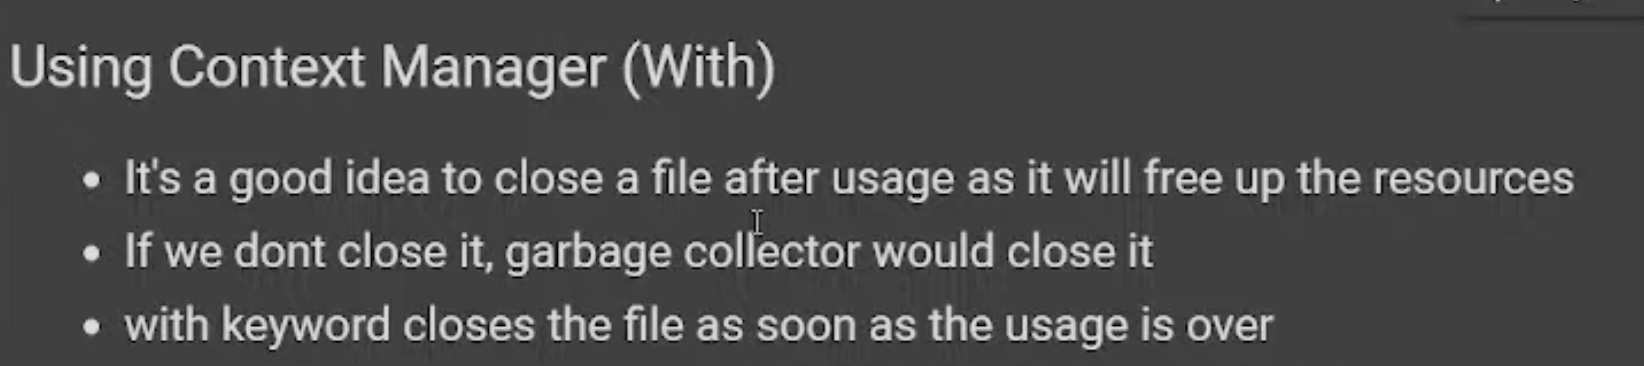

In [29]:
## with is alternative usage of f.close()

## with

with open('sample1.txt','w') as f:
    f.write('selmon bhai') ##file will close automatically

In [30]:
f.write('hi')

ValueError: I/O operation on closed file.

In [31]:
## try f.read() now

with open('sample3.txt','r') as f:
    print(f.read())

Hello
Hi
How are you?
I am fine



In [33]:
## moving within a file -> 10 char then 10 char
with open('sample3.txt','r') as f:
    print(f.read(10))
    print(f.read(10))
## used to read big files

Hello
Hi
H
ow are you


In [36]:
## benefit ? to load big file in memory

big_L=['Hello world ' for i in range(1000)]

with open('big.txt','w') as f:
    f.writelines(big_L)

In [37]:
with open('big.txt','r') as f:
    chunk_size=100

    while len(f.read(chunk_size)) > 0:
        print(f.read(chunk_size))
        f.read(chunk_size)


o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world Hello wo
o world Hello world Hello world Hello world Hello world Hello world Hello world Hello world

In [40]:
## seek and tell function 
with open('sample3.txt','r') as f:
    print(f.read(10))
    print(f.tell()) ## mechanism to tell buffer or cursor is at where currently (printed 0 to 9 char next char will be 10th char)
    
## cursor ko kheech ke kahi bhi le ja sakthe ho 


Hello
Hi
H
10


In [42]:
## seek and tell function 
with open('sample3.txt','r') as f:
    print(f.read(10))
    print(f.tell()) ## mechanism to tell buffer or cursor is at where currently (printed 0 to 9 char next char will be 10th char)
    f.seek(0) ## cursor ko wapas 0th char pe le jao
    print(f.read(10))
    print(f.tell())
## cursor ko kheech ke kahi bhi le ja sakthe ho 


## tell batayega kaha ho presently
## seek ke through kahi bhi jaa sakthe ho 

Hello
Hi
H
10
Hello
Hi
H
10


In [43]:
## seek during write 

with open('sample2.txt','w') as f:
    f.write('priyanshu')
    f.seek(0)
    f.write('X')


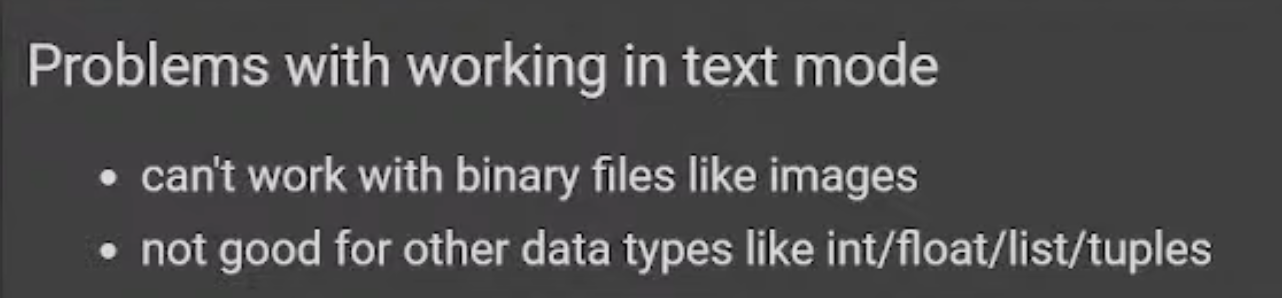

In [44]:
## working with binary file 

with open('image.jpg','r') as f:
    f.read()
## textual data are unicode characters 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [45]:
## rb is read binary mode 
with open('image.jpg','rb') as f:
    with open('screenshot.jpg','wb') as wf:
        wf.write(f.read())
                        
     


In [46]:
## working with other data types 
with open('sample2.txt','w') as f:
    f.write(5)

## always work with unicode char that is string 


TypeError: write() argument must be str, not int

In [49]:
## working with other data types 
with open('sample2.txt','w') as f:
    f.write('5')
    f.read() + 5


UnsupportedOperation: not readable

In [50]:
## more complex data

d={
    'name':'nitish',
    'age':33,
    'gender':'male'
}

with open('sample.txt','w') as f:
    f.write(d)

TypeError: write() argument must be str, not dict

In [51]:
## more complex data

d={
    'name':'nitish',
    'age':33,
    'gender':'male'
}

with open('sample.txt','w') as f:
    f.write(str(d))

In [56]:
with open('sample.txt','r') as f:
    print(f.read())
    print(type(f.read()))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'str'>


## to solve this we use concept of serialization and deserialization

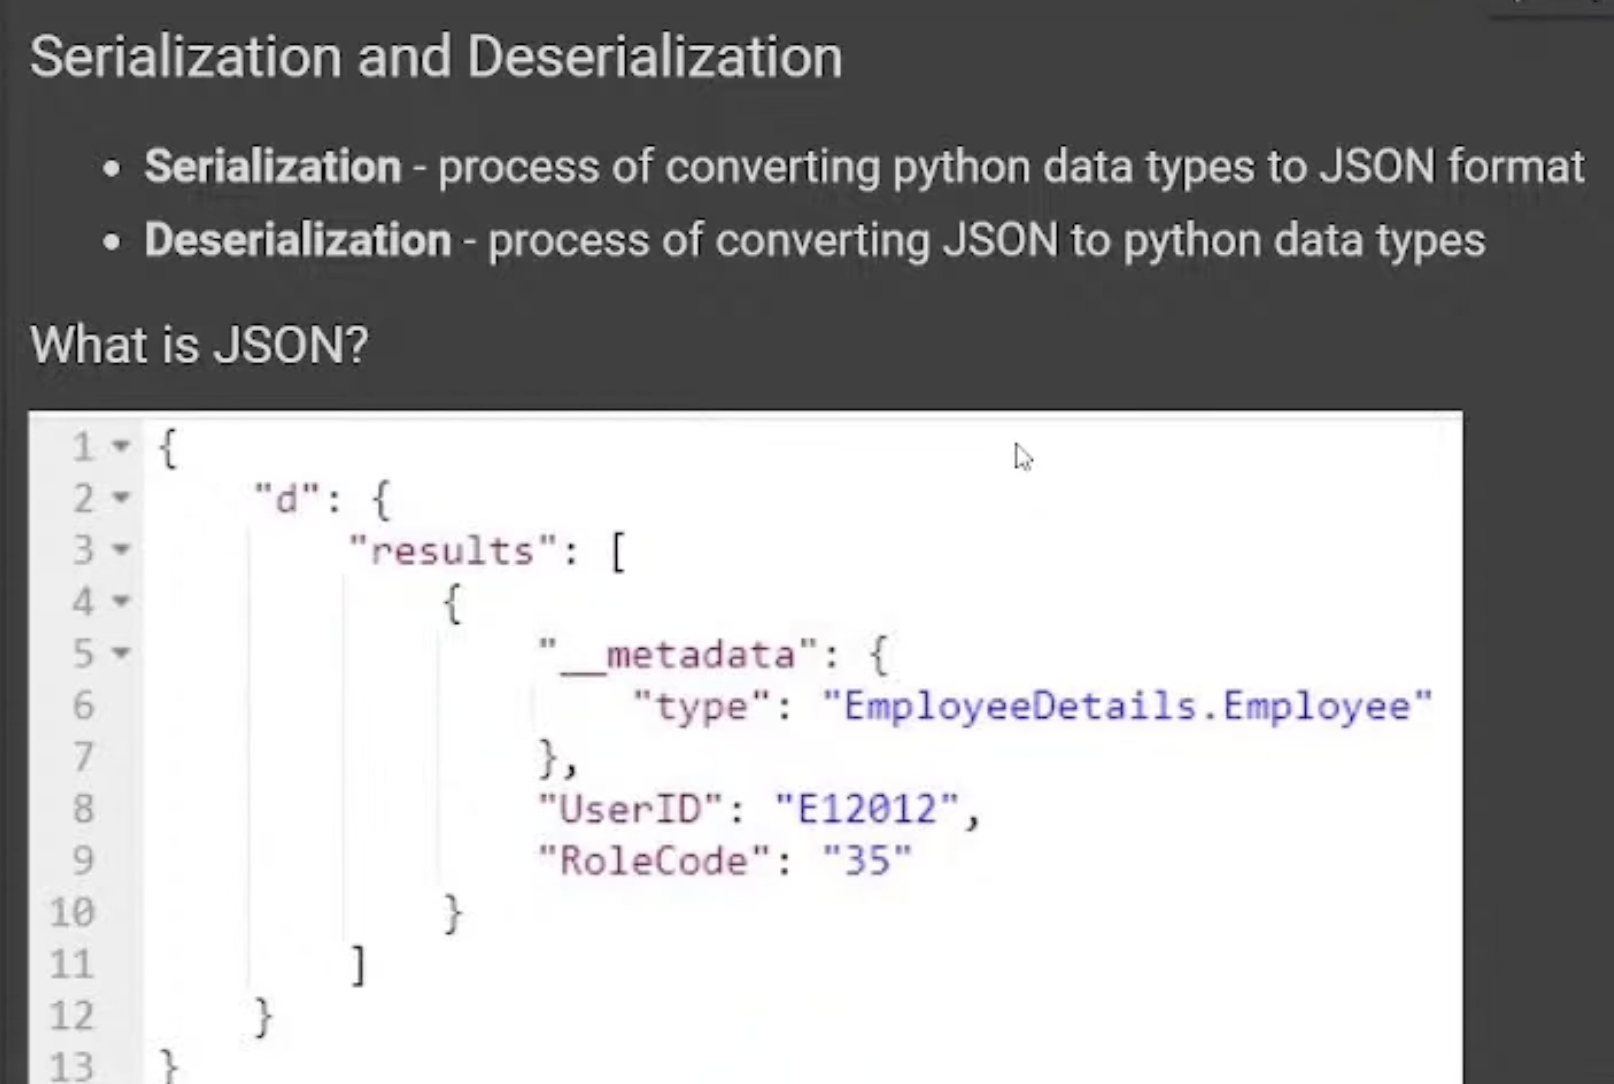

In [ ]:
## JSON -> Java Script On Notation  (a universal dataformat which is understood by all programming lang) every api uses json 

In [ ]:
## serialization using json module

## list->json and read it

L=[1,2,3,4]

import json 
with open('demo.json','w') as f:
    json.dump(L,f) ## dump(kya dump karna hai,file handler object)



In [63]:
## dict
d={
    'name':'nitish',
    'age':33,
    'gender':'male'
}

with open('demo1.json','w') as f:
    json.dump(d,f,indent=4) ## for better clarity

In [67]:
## deserialization
import json 

with open('demo.json','r') as f:
    print(json.load(f))
    

[1, 2, 3, 4]


In [69]:
import json 

with open('demo.json','r') as f:
    s=json.load(f)
    print(s,type(s))
    

[1, 2, 3, 4] <class 'list'>


In [75]:
## serialize and deserialize tuple
import json

t=(1,2,3,4,5)

with open('demo3.json','w') as f:
    json.dump(t,f) ## tuple ko bhi dump karoge toh hame list hi dega
## you cannot store tuple

In [76]:
## serialize and deserialize a nested dict 

d={
    'name':'nitish',
    'marks':[23,15,10,40,23]
}

with open('demo4.json','w') as f:
    json.dump(d,f)

## Serializing and Deserializing custom objects

In [78]:
class Person:
    def __init__(self,fname,lname,age,gender):
        self.fname=fname
        self.lname=lname
        self.age=age
        self.gender=gender

## format to printed in 
## --> nitish singh 33 male 

In [79]:
person=Person('nitish','singh',33,'male')

In [81]:
## as a string
import json 

with open('demo5.json','w') as f:
    json.dump(person,f)

## custom objects are not serializable 

## soln: you have to specify how your object will be serializable 

TypeError: Object of type Person is not JSON serializable

In [ ]:
import json

def show_object(person):
    if isinstance(person,Person):
        return "{} {} age ->{} gender ->{}".format(person.fname,person.lname,person.age,person.gender)

with open('demo5.json','w') as f:
    json.dump(person,f,default=show_object)


In [85]:
import json

def show_object(person):
    if isinstance(person,Person):
        return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo6.json','w') as f:
    json.dump(person,f,default=show_object)


In [87]:
## deseralizing

with open('demo5.json','r') as f:
    print(json.load(f))

nitish singh age ->33 gender ->male


In [88]:
with open('demo6.json','r') as f:
    d=json.load(f)
    print(d,type(d))

{'name': 'nitish singh', 'age': 33, 'gender': 'male'} <class 'dict'>


In [89]:
## what if i want to serialize as it is and deserialize as it is 

##soln: you convert your object into binary (pickling)

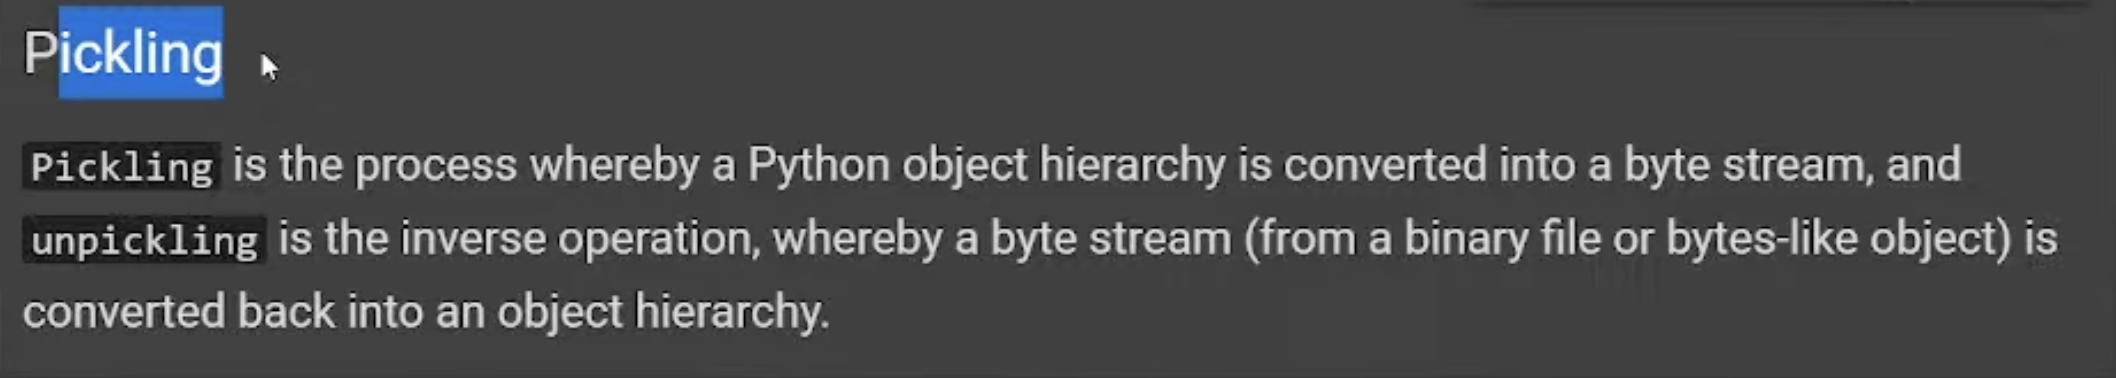

In [90]:
class Person:
    def __init__(self,name,age):
        self.name=name
        self.age=age
    
    def display_info(self):
        print("Hi my name is",self.name,'and I am ',self.age,'years old')

p=Person('nitish',33)

In [95]:
## pickle dump

import pickle
with open('person.pkl','wb') as f: ## we use wb not w
    pickle.dump(p,f)

In [98]:
with open('person.pkl','rb') as f:
    df=pickle.load(f)
    print(df)

df.display_info() ## df becomes object 

Hi my name is nitish and I am  33 years old


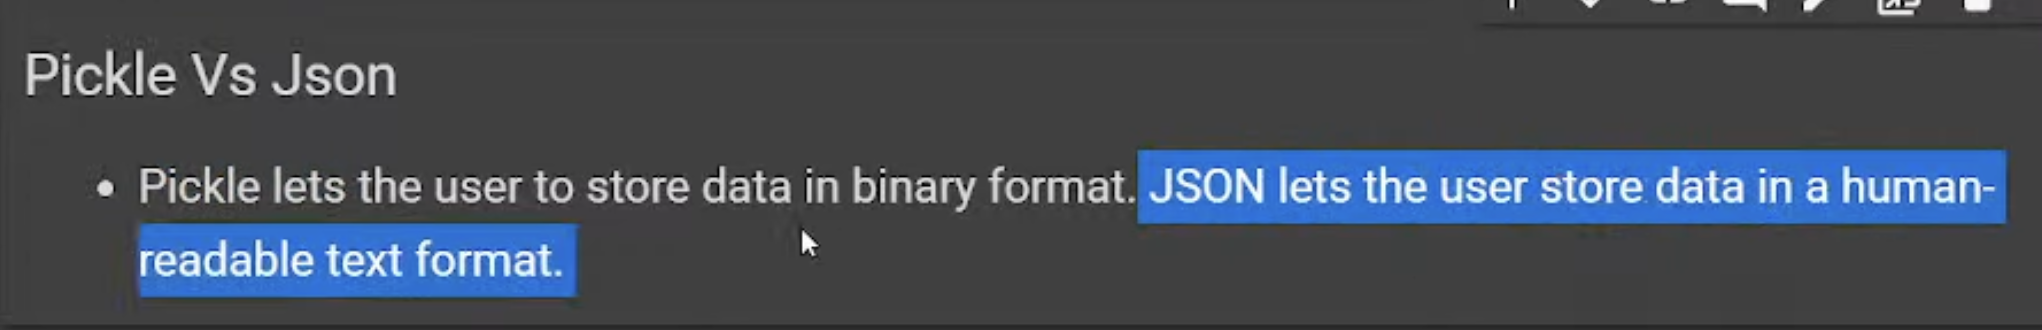